# Poisson Process: Coal-mining explosions

**date**
: 2021-04-10

**data**
: `coal.csv`

**ref**
: Computer book A, Activities 38

**desc**
: Investigating whether a **Poisson process** might be a good model for the occurences of coal-mining explosions.
We will first look at whether the **exponential model** is a good fit for the intervals between coal-mining explosions.
Next we will examine whether the rate of coal-mining explosions remained constant over the period of observation.

In [1]:
from scripts.data import Data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
c: pd.DataFrame = Data.load_coal()

We'll first take a look at the data to get a general feel for it.

In [3]:
c.head(10)

,Interval
0,157
1,123
2,2
3,124
4,12
5,4
6,10
7,216
8,80
9,12


Note that the parameter `Interval` is in unit **days**.

## Exponential model

We first compare the distribution's mean with its standard deviation, as we would expect them to be approximately the same in an exponential model.

In [4]:
c["Interval"].mean()

213.4157894736842

In [5]:
c["Interval"].std()

313.5484752159066

We next plot the data as a histogram to check how close it resembles that of an exponential distribution.

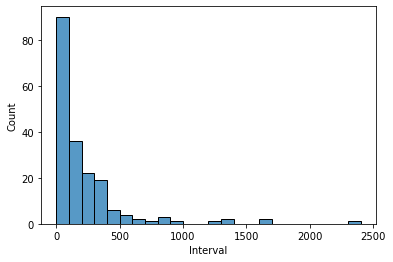

In [6]:
sns.histplot(c, x="Interval", binwidth=100)
plt.show()

We note that the histogram is highly right-skewed, just as we expect for an exponential model.
However, the mean is not particularly close to the standard devation.
We have some doubt over whether the interval in days between sucessive explosions is modelled by a exponential distribution.

## Rate of occurence over time

We will plot a scatterplot of number of explosions against time (in days) to see if the rate of occurence has remained constant over the period.

We need to add two columns to the `DataFrame`: an event id and the sumulative sum of `Intervals`.

In [7]:
# add event number
c["event_id"] = np.arange(start=1, stop=c["Interval"].size+1)

In [8]:
# add cum.sum of interval
c["days"] = c["Interval"].cumsum()

In [9]:
c.head()

,Interval,event_id,days
0,157,1,157
1,123,2,280
2,2,3,282
3,124,4,406
4,12,5,418


We can now plot the scatterplot show `event_id` against `days`.

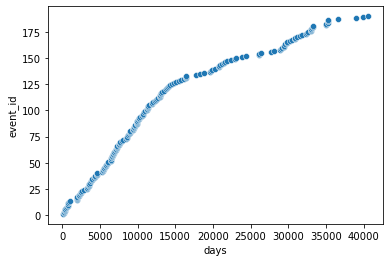

In [11]:
sns.scatterplot(data=c, x="days", y="event_id")
plt.show()

It looks as though the rate of occurence of coal-mining explosions decreased over the period, with explosions being less frequent towards the end of the period.
We conclude that the rate of occurence was not constant over time.